Tommy john surgery dataset taken from MLB Player Analysis (@MLBPlayerAnalys

Data Import and cleaning

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

url1 = "https://github.com/mmcintire00/tommy_john_velocity/blob/main/Tommy%20John%20Surgery%20List%20(%40MLBPlayerAnalys)%20-%20TJ%20List.csv?raw=true"
url2 = "https://github.com/mmcintire00/tommy_john_velocity/blob/main/stats(1).csv?raw=true"

df_tj_raw = pd.read_csv(url1, usecols=[ 'mlbamid', 'TJ Surgery Date', 'Year', 'Position', 'Level', 'Player']) # import only these values, will merge with stats dataset
df_velo_raw = pd.read_csv(url2) # pitcher stats 2015-2021

df_tj_raw = df_tj_raw.rename(columns={'mlbamid':'player_id', 'Year': 'year', 'TJ Surgery Date': 'tj_surgery_date'})

In [ ]:
# dataset of players whove had tj surgery
df_tj_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           1980 non-null   object 
 1   tj_surgery_date  1980 non-null   object 
 2   Level            1980 non-null   object 
 3   Position         1980 non-null   object 
 4   player_id        1949 non-null   float64
 5   year             1980 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 92.9+ KB


In [ ]:
df_tj_raw.head()

,Player,tj_surgery_date,Level,Position,player_id,year
0,Dustin May,5/12/2021,MLB,P,669160.0,2021
1,Ben Hecht,5/11/2021,AA,P,643357.0,2021
2,Harol Gonzalez,5/1/2021,AAA,P,656083.0,2021
3,Luis Avilan,4/28/2021,MLB,P,501593.0,2021
4,Adrian Morejon,4/20/2021,MLB,P,670970.0,2021


In [ ]:
# players stats dataset
df_velo_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_name             437 non-null    object 
 1    first_name           437 non-null    object 
 2   player_id             437 non-null    int64  
 3   year                  437 non-null    int64  
 4   pitch_hand            437 non-null    object 
 5   n                     437 non-null    int64  
 6   n_ff_formatted        422 non-null    float64
 7   ff_avg_speed          422 non-null    float64
 8   ff_avg_spin           422 non-null    float64
 9   n_fastball_formatted  437 non-null    float64
 10  fastball_avg_speed    437 non-null    float64
 11  fastball_avg_spin     437 non-null    int64  
 12  n_breaking_formatted  437 non-null    float64
 13  breaking_avg_speed    437 non-null    float64
 14  breaking_avg_spin     437 non-null    int64  
 15  n_offspeed_formatted  4

In [ ]:
# rename columns
df_velo_raw = df_velo_raw.rename(columns={'n':'total_pitches', 'n_fastball_formatted':'pct_fastball_thrown', 'n_ff_formatted':'pct_fourseam_thrown', 'n_breaking_formatted':'pct_breaking_thrown', 'n_offspeed_formatted':'pct_offspeed_thrown'})

In [ ]:
# merge first and last name in stats dataset
df_velo_raw['player_name'] = df_velo_raw[[' first_name','last_name']].apply(lambda x: ' '.join(x), axis=1)

In [ ]:
df_velo_raw.head()

,last_name,first_name,player_id,year,pitch_hand,total_pitches,pct_fourseam_thrown,ff_avg_speed,ff_avg_spin,pct_fastball_thrown,fastball_avg_speed,fastball_avg_spin,pct_breaking_thrown,breaking_avg_speed,breaking_avg_spin,pct_offspeed_thrown,offspeed_avg_speed,offspeed_avg_spin,Unnamed: 18,player_name
0,Greinke,Zack,425844,2018,R,3129,44.2,89.5,2335.0,50.1,89.6,2329,28.9,78.7,2514,21.0,86.5,1738.0,NaN,Zack Greinke
1,Hamels,Cole,430935,2018,L,2962,29.8,92.3,2083.0,62.9,90.7,2071,18.2,80.5,2176,18.9,83.3,1652.0,NaN,Cole Hamels
2,Verlander,Justin,434378,2018,R,3420,61.2,95.0,2618.0,61.8,95.0,2618,36.8,83.8,2767,1.5,87.4,1899.0,NaN,Justin Verlander
3,Kluber,Corey,446372,2018,R,3076,8.9,92.0,2410.0,71.0,90.5,2425,22.5,83.8,2607,6.6,85.2,1751.0,NaN,Corey Kluber
4,Shields,James,448306,2018,R,3186,26.5,89.5,2271.0,62.0,88.2,2281,19.7,78.2,2478,18.2,83.4,1665.0,NaN,James Shields


In [ ]:
df_velo_raw = df_velo_raw.drop(columns=['Unnamed: 18'])

In [ ]:
df_tj_pitcher_only = df_tj_raw.loc[df_tj_raw['Position'] == 'P'] # analysis will only look at pitchers

In [ ]:
df_tj_pitcher_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797 entries, 0 to 1979
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           1797 non-null   object 
 1   tj_surgery_date  1797 non-null   object 
 2   Level            1797 non-null   object 
 3   Position         1797 non-null   object 
 4   player_id        1768 non-null   float64
 5   year             1797 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 98.3+ KB


In [ ]:
df_tj_pitcher_only = df_tj_pitcher_only.rename(columns={'Player':'player_name'})

In [ ]:
df_tj_mlb_pitchers = df_tj_pitcher_only.loc[df_tj_pitcher_only['Level'] == 'MLB'] # analysis will only look at MLB players

In [ ]:
df_tj_mlb_pitchers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 1979
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player_name      486 non-null    object 
 1   tj_surgery_date  486 non-null    object 
 2   Level            486 non-null    object 
 3   Position         486 non-null    object 
 4   player_id        485 non-null    float64
 5   year             486 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 26.6+ KB


In [ ]:
df_tj_mlb_p_15_21 = df_tj_mlb_pitchers.loc[df_tj_mlb_pitchers['year'] >= 2015] # only look at players from 2015 and later

In [ ]:
df_tj_mlb_p_15_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 769
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player_name      145 non-null    object 
 1   tj_surgery_date  145 non-null    object 
 2   Level            145 non-null    object 
 3   Position         145 non-null    object 
 4   player_id        145 non-null    float64
 5   year             145 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 7.9+ KB


In [ ]:
df_velo_raw = df_velo_raw.drop(columns=['last_name', ' first_name']) # unneeded after merge

In [ ]:
# check nulls in stats data
df_velo_raw.isnull().sum()

player_id               0
year                    0
pitch_hand              0
total_pitches           0
pct_fourseam_thrown    15
ff_avg_speed           15
ff_avg_spin            15
pct_fastball_thrown     0
fastball_avg_speed      0
fastball_avg_spin       0
pct_breaking_thrown     0
breaking_avg_speed      0
breaking_avg_spin       0
pct_offspeed_thrown    11
offspeed_avg_speed     11
offspeed_avg_spin      11
player_name             0
dtype: int64

In [ ]:
# fill null values with mean
df_velo_raw['pct_fourseam_thrown'] = df_velo_raw['pct_fourseam_thrown'].fillna(df_velo_raw['pct_fourseam_thrown'].mean())
df_velo_raw['ff_avg_speed'] = df_velo_raw['ff_avg_speed'].fillna(df_velo_raw['ff_avg_speed'].mean())
df_velo_raw['ff_avg_spin'] = df_velo_raw['ff_avg_spin'].fillna(df_velo_raw['ff_avg_spin'].mean())
df_velo_raw['pct_offspeed_thrown'] = df_velo_raw['pct_offspeed_thrown'].fillna(df_velo_raw['pct_offspeed_thrown'].mean())
df_velo_raw['offspeed_avg_speed'] = df_velo_raw['offspeed_avg_speed'].fillna(df_velo_raw['offspeed_avg_speed'].mean())
df_velo_raw['offspeed_avg_spin'] = df_velo_raw['offspeed_avg_spin'].fillna(df_velo_raw['offspeed_avg_spin'].mean())

In [ ]:
# recheck nulls
df_velo_raw.isnull().sum()

player_id              0
year                   0
pitch_hand             0
total_pitches          0
pct_fourseam_thrown    0
ff_avg_speed           0
ff_avg_spin            0
pct_fastball_thrown    0
fastball_avg_speed     0
fastball_avg_spin      0
pct_breaking_thrown    0
breaking_avg_speed     0
breaking_avg_spin      0
pct_offspeed_thrown    0
offspeed_avg_speed     0
offspeed_avg_spin      0
player_name            0
dtype: int64

In [ ]:
df_velo_raw

,player_id,year,pitch_hand,total_pitches,pct_fourseam_thrown,ff_avg_speed,ff_avg_spin,pct_fastball_thrown,fastball_avg_speed,fastball_avg_spin,pct_breaking_thrown,breaking_avg_speed,breaking_avg_spin,pct_offspeed_thrown,offspeed_avg_speed,offspeed_avg_spin,player_name
0,425844,2018,R,3129,44.2000,89.500000,2335.000000,50.1,89.6,2329,28.9,78.7,2514,21.000000,86.500000,1738.000000,Zack Greinke
1,430935,2018,L,2962,29.8000,92.300000,2083.000000,62.9,90.7,2071,18.2,80.5,2176,18.900000,83.300000,1652.000000,Cole Hamels
2,434378,2018,R,3420,61.2000,95.000000,2618.000000,61.8,95.0,2618,36.8,83.8,2767,1.500000,87.400000,1899.000000,Justin Verlander
3,446372,2018,R,3076,8.9000,92.000000,2410.000000,71.0,90.5,2425,22.5,83.8,2607,6.600000,85.200000,1751.000000,Corey Kluber
4,448306,2018,R,3186,26.5000,89.500000,2271.000000,62.0,88.2,2281,19.7,78.2,2478,18.200000,83.400000,1665.000000,James Shields
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,645261,2019,R,3090,30.2000,95.600000,2356.000000,57.8,95.5,2374,30.1,84.8,2479,12.100000,89.100000,1923.000000,Sandy Alcantara
433,647336,2019,R,2555,18.7000,92.900000,2362.000000,63.4,92.4,2231,24.3,83.2,2776,12.400000,81.200000,2178.000000,Mike Soroka
434,656427,2019,R,3078,46.7000,94.300000,2225.000000,58.5,93.8,2183,39.4,82.8,2426,2.000000,86.200000,1704.000000,Jack Flaherty
435,664192,2019,L,2641,33.2109,92.754265,2262.606635,64.9,90.2,2219,35.1,78.9,2091,13.675822,85.027465,1733.373239,Joey Lucchesi


In [ ]:
# prepare tj list for merge, convert player id to int
df_tj_mlb_p_15_21['player_id'] = df_tj_mlb_p_15_21['player_id'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# create column in tj dataframe = 1, for tj surgery
df_tj_mlb_p_15_21['tj_surgery'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# merge velo data with tj data, left outter join on player_id
tj_velo_merge = pd.merge(df_velo_raw, df_tj_mlb_p_15_21, on='player_id', how='left')

In [ ]:
tj_velo_merge.head()

,player_id,year_x,pitch_hand,total_pitches,pct_fourseam_thrown,ff_avg_speed,ff_avg_spin,pct_fastball_thrown,fastball_avg_speed,fastball_avg_spin,pct_breaking_thrown,breaking_avg_speed,breaking_avg_spin,pct_offspeed_thrown,offspeed_avg_speed,offspeed_avg_spin,player_name_x,player_name_y,tj_surgery_date,Level,Position,year_y,tj_surgery
0,425844,2018,R,3129,44.2,89.5,2335.0,50.1,89.6,2329,28.9,78.7,2514,21.0,86.5,1738.0,Zack Greinke,NaN,NaN,NaN,NaN,NaN,NaN
1,430935,2018,L,2962,29.8,92.3,2083.0,62.9,90.7,2071,18.2,80.5,2176,18.9,83.3,1652.0,Cole Hamels,NaN,NaN,NaN,NaN,NaN,NaN
2,434378,2018,R,3420,61.2,95.0,2618.0,61.8,95.0,2618,36.8,83.8,2767,1.5,87.4,1899.0,Justin Verlander,Justin Verlander,9/30/2020,MLB,P,2020.0,1.0
3,446372,2018,R,3076,8.9,92.0,2410.0,71.0,90.5,2425,22.5,83.8,2607,6.6,85.2,1751.0,Corey Kluber,NaN,NaN,NaN,NaN,NaN,NaN
4,448306,2018,R,3186,26.5,89.5,2271.0,62.0,88.2,2281,19.7,78.2,2478,18.2,83.4,1665.0,James Shields,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replace null values with 0...these are player not had tj
merged_data['tj_surgery'] = tj_velo_merge['tj_surgery'].replace(np.nan, 0)

In [ ]:
merged_data.describe()

,player_id,year,total_pitches,pct_fourseam_thrown,ff_avg_speed,ff_avg_spin,pct_fastball_thrown,fastball_avg_speed,fastball_avg_spin,pct_breaking_thrown,breaking_avg_speed,breaking_avg_spin,pct_offspeed_thrown,offspeed_avg_speed,offspeed_avg_spin,tj_surgery_year,tj_surgery
count,437.000000,437.000000,437.000000,422.000000,422.000000,422.000000,437.000000,437.00000,437.000000,437.000000,437.000000,437.00000,426.000000,426.000000,426.000000,54.000000,437.000000
mean,531728.313501,2017.789474,2433.386728,33.210900,92.754265,2262.606635,58.894050,92.18238,2239.121281,27.775515,81.277346,2401.97254,13.675822,85.027465,1733.373239,2017.481481,0.123570
std,82142.287664,2.075762,953.847585,15.629969,2.507825,150.260223,10.430201,2.72612,158.922595,12.258845,3.962318,258.26795,8.407896,2.876186,226.531959,1.988085,0.329467
min,112526.000000,2015.000000,541.000000,0.100000,82.300000,1810.000000,11.200000,82.30000,1806.000000,0.800000,70.900000,1359.00000,0.000000,74.900000,781.000000,2015.000000,0.000000
25%,467100.000000,2016.000000,2295.000000,22.525000,91.300000,2168.000000,52.500000,90.60000,2136.000000,19.500000,78.800000,2213.00000,6.925000,83.400000,1595.000000,2015.000000,0.000000
50%,543101.000000,2018.000000,2845.000000,34.350000,92.800000,2254.500000,58.500000,92.20000,2229.000000,27.700000,81.400000,2411.00000,12.350000,85.200000,1709.500000,2018.000000,0.000000
75%,594798.000000,2019.000000,3082.000000,45.600000,94.400000,2353.750000,64.900000,94.00000,2339.000000,35.400000,84.100000,2574.00000,19.075000,87.000000,1871.750000,2020.000000,0.000000
max,669456.000000,2021.000000,3686.000000,64.200000,98.900000,2831.000000,90.500000,98.90000,2850.000000,88.800000,91.900000,3045.00000,41.300000,93.200000,2512.000000,2020.000000,1.000000


In [ ]:
clean_merge_data = merged_data.drop(columns=['Position', 'Level', 'tj_surgery_date'])
clean_merge_data.head()

,last_name,first_name,player_id,year,pitch_hand,total_pitches,pct_fourseam_thrown,ff_avg_speed,ff_avg_spin,pct_fastball_thrown,fastball_avg_speed,fastball_avg_spin,pct_breaking_thrown,breaking_avg_speed,breaking_avg_spin,pct_offspeed_thrown,offspeed_avg_speed,offspeed_avg_spin,full_name,player_name,tj_surgery_year,tj_surgery
0,Greinke,Zack,425844,2018,R,3129,44.2,89.5,2335.0,50.1,89.6,2329,28.9,78.7,2514,21.0,86.5,1738.0,Zack Greinke,NaN,NaN,0.0
1,Hamels,Cole,430935,2018,L,2962,29.8,92.3,2083.0,62.9,90.7,2071,18.2,80.5,2176,18.9,83.3,1652.0,Cole Hamels,NaN,NaN,0.0
2,Verlander,Justin,434378,2018,R,3420,61.2,95.0,2618.0,61.8,95.0,2618,36.8,83.8,2767,1.5,87.4,1899.0,Justin Verlander,Justin Verlander,2020.0,1.0
3,Kluber,Corey,446372,2018,R,3076,8.9,92.0,2410.0,71.0,90.5,2425,22.5,83.8,2607,6.6,85.2,1751.0,Corey Kluber,NaN,NaN,0.0
4,Shields,James,448306,2018,R,3186,26.5,89.5,2271.0,62.0,88.2,2281,19.7,78.2,2478,18.2,83.4,1665.0,James Shields,NaN,NaN,0.0


In [ ]:
no_tj_player_stats = clean_merge_data[clean_merge_data['tj_surgery'] == 0]
tj_player_stats = clean_merge_data[clean_merge_data['tj_surgery'] == 1]
no_tj_player_stats.describe()

,player_id,year,total_pitches,pct_fourseam_thrown,ff_avg_speed,ff_avg_spin,pct_fastball_thrown,fastball_avg_speed,fastball_avg_spin,pct_breaking_thrown,breaking_avg_speed,breaking_avg_spin,pct_offspeed_thrown,offspeed_avg_speed,offspeed_avg_spin,tj_surgery_year,tj_surgery
count,383.000000,383.00000,383.000000,371.000000,371.000000,371.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,374.000000,374.000000,374.000000,0.0,383.0
mean,530733.798956,2017.75718,2438.083551,32.999461,92.542049,2255.261456,58.618277,91.987990,2230.292428,27.843603,81.127937,2400.292428,13.864439,84.821658,1732.930481,NaN,0.0
std,83946.062975,2.08109,943.353941,15.341773,2.464924,146.423171,10.173005,2.698033,154.717876,12.467690,3.895349,256.364327,8.437980,2.819111,222.218935,NaN,0.0
min,112526.000000,2015.00000,541.000000,0.100000,82.300000,1810.000000,11.200000,82.300000,1806.000000,0.800000,70.900000,1359.000000,0.200000,74.900000,781.000000,NaN,0.0
25%,467100.000000,2016.00000,2445.000000,22.750000,91.100000,2166.000000,52.700000,90.400000,2128.500000,19.350000,78.700000,2212.500000,7.300000,83.325000,1595.750000,NaN,0.0
50%,543101.000000,2018.00000,2832.000000,34.200000,92.600000,2251.000000,58.500000,92.100000,2223.000000,27.700000,81.400000,2413.000000,12.400000,85.050000,1707.500000,NaN,0.0
75%,594798.000000,2019.00000,3073.000000,45.000000,94.200000,2348.500000,64.900000,93.750000,2331.500000,36.200000,83.900000,2569.500000,19.200000,86.700000,1869.750000,NaN,0.0
max,669456.000000,2021.00000,3686.000000,64.200000,98.900000,2831.000000,89.400000,98.900000,2850.000000,88.800000,91.900000,3045.000000,41.300000,91.800000,2512.000000,NaN,0.0


In [ ]:
tj_player_stats.describe()

,player_id,year,total_pitches,pct_fourseam_thrown,ff_avg_speed,ff_avg_spin,pct_fastball_thrown,fastball_avg_speed,fastball_avg_spin,pct_breaking_thrown,breaking_avg_speed,breaking_avg_spin,pct_offspeed_thrown,offspeed_avg_speed,offspeed_avg_spin,tj_surgery_year,tj_surgery
count,54.000000,54.000000,54.000000,51.000000,51.000000,51.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,52.000000,52.000000,52.000000,54.000000,54.0
mean,538782.000000,2018.018519,2400.074074,34.749020,94.298039,2316.039216,60.850000,93.561111,2301.740741,27.292593,82.337037,2413.888889,12.319231,86.507692,1736.557692,2017.481481,1.0
std,68246.191853,2.041926,1034.018135,17.677357,2.286612,167.753743,12.024452,2.541684,175.155800,10.752847,4.299245,273.599671,8.138484,2.875307,257.811332,1.988085,0.0
min,434378.000000,2015.000000,571.000000,0.200000,85.700000,1969.000000,37.200000,85.600000,1955.000000,4.800000,71.300000,1762.000000,0.000000,79.500000,1122.000000,2015.000000,1.0
25%,458681.000000,2016.000000,1140.250000,21.450000,93.300000,2191.000000,52.100000,91.725000,2174.250000,20.900000,79.725000,2222.000000,4.950000,84.500000,1589.500000,2015.000000,1.0
50%,554430.000000,2018.000000,2878.000000,35.500000,94.300000,2312.000000,58.700000,93.750000,2291.000000,28.000000,83.150000,2389.000000,11.450000,86.900000,1737.500000,2018.000000,1.0
75%,592836.000000,2020.000000,3155.500000,50.350000,95.700000,2459.000000,63.800000,95.200000,2459.250000,34.175000,85.850000,2627.750000,17.525000,88.125000,1900.000000,2020.000000,1.0
max,659275.000000,2021.000000,3655.000000,62.900000,98.700000,2618.000000,90.500000,98.600000,2698.000000,53.400000,89.000000,3033.000000,32.400000,93.200000,2416.000000,2020.000000,1.0


In [ ]:
tj_player_stats['tj_surgery'].groupby(tj_player_stats['year']).count()


year
2015     7
2016     8
2017    10
2018     6
2019     7
2020     7
2021     9
Name: tj_surgery, dtype: int64

In [ ]:
clean_merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 436
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_name            437 non-null    object 
 1    first_name          437 non-null    object 
 2   player_id            437 non-null    int64  
 3   year                 437 non-null    int64  
 4   pitch_hand           437 non-null    object 
 5   total_pitches        437 non-null    int64  
 6   pct_fourseam_thrown  422 non-null    float64
 7   ff_avg_speed         422 non-null    float64
 8   ff_avg_spin          422 non-null    float64
 9   pct_fastball_thrown  437 non-null    float64
 10  fastball_avg_speed   437 non-null    float64
 11  fastball_avg_spin    437 non-null    int64  
 12  pct_breaking_thrown  437 non-null    float64
 13  breaking_avg_speed   437 non-null    float64
 14  breaking_avg_spin    437 non-null    int64  
 15  pct_offspeed_thrown  426 non-null    flo

In [ ]:
clean_merge_data['pct_fourseam_thrown'] = clean_merge_data['pct_fourseam_thrown'].fillna(clean_merge_data['pct_fourseam_thrown'].mean())
clean_merge_data['ff_avg_speed'] = clean_merge_data['ff_avg_speed'].fillna(clean_merge_data['ff_avg_speed'].mean())
clean_merge_data['ff_avg_spin'] = clean_merge_data['ff_avg_spin'].fillna(clean_merge_data['ff_avg_spin'].mean())
clean_merge_data['pct_offspeed_thrown'] = clean_merge_data['pct_offspeed_thrown'].fillna(clean_merge_data['pct_offspeed_thrown'].mean())
clean_merge_data['offspeed_avg_speed'] = clean_merge_data['offspeed_avg_speed'].fillna(clean_merge_data['offspeed_avg_speed'].mean())
clean_merge_data['offspeed_avg_spin'] = clean_merge_data['offspeed_avg_spin'].fillna(clean_merge_data['offspeed_avg_spin'].mean())

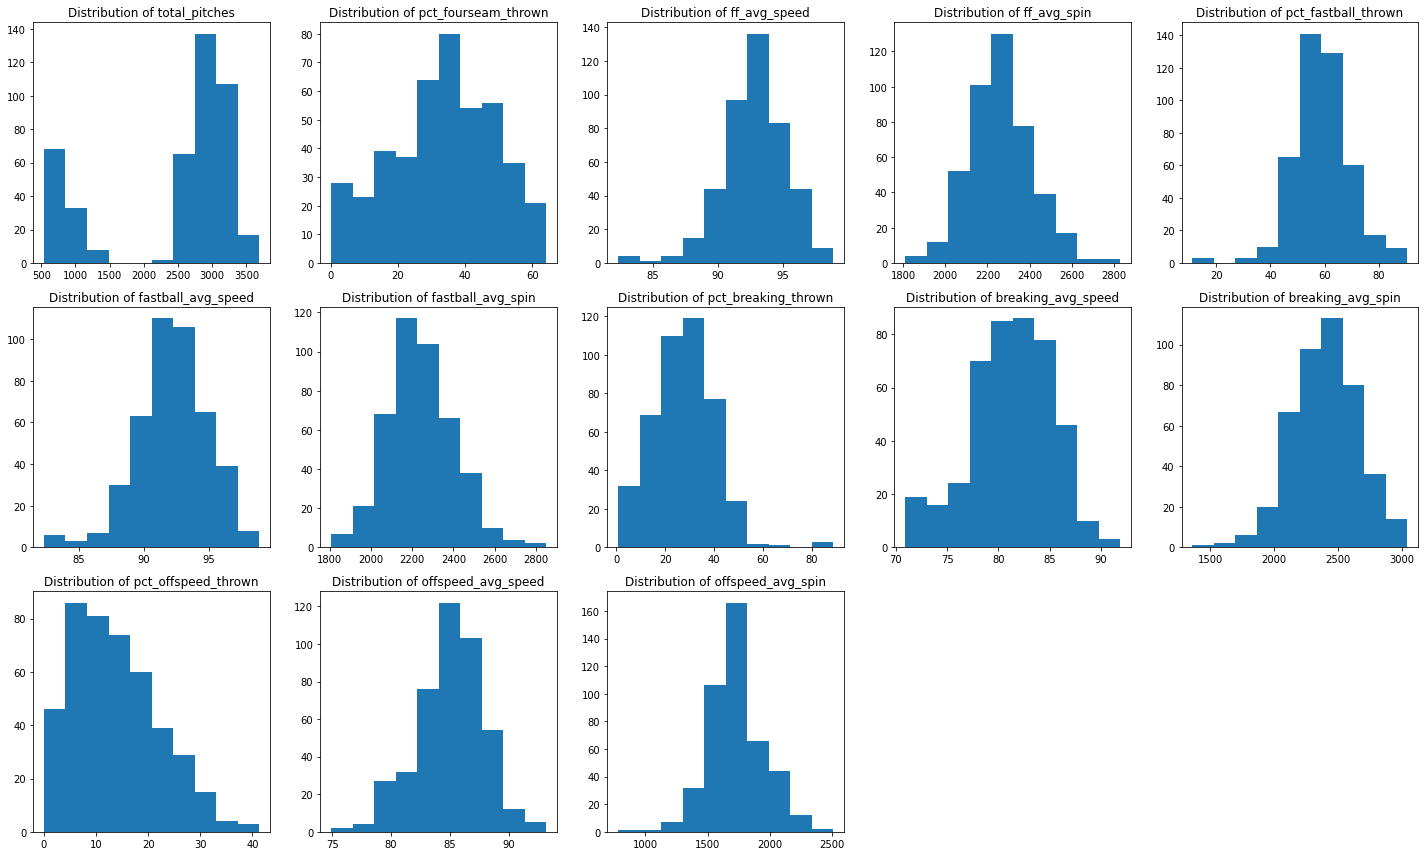

In [ ]:
# numerical data histograms after cleaning data
plt.figure(figsize=(20,12))

nums_list = clean_merge_data.select_dtypes(include=['int64', 'float64'])
nums_list = nums_list.drop(columns=['tj_surgery_year', 'tj_surgery', 'year', 'player_id'])
var_list = nums_list.columns.unique()

for index, column in enumerate(var_list):
  plt.subplot(3,5,index+1)
  plt.hist(clean_merge_data[column], bins=10)
  plt.title('Distribution of {}'.format(column))

plt.tight_layout()
plt.show()

In [ ]:
clean_merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 436
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_name            437 non-null    object 
 1    first_name          437 non-null    object 
 2   player_id            437 non-null    int64  
 3   year                 437 non-null    int64  
 4   pitch_hand           437 non-null    object 
 5   total_pitches        437 non-null    int64  
 6   pct_fourseam_thrown  437 non-null    float64
 7   ff_avg_speed         437 non-null    float64
 8   ff_avg_spin          437 non-null    float64
 9   pct_fastball_thrown  437 non-null    float64
 10  fastball_avg_speed   437 non-null    float64
 11  fastball_avg_spin    437 non-null    int64  
 12  pct_breaking_thrown  437 non-null    float64
 13  breaking_avg_speed   437 non-null    float64
 14  breaking_avg_spin    437 non-null    int64  
 15  pct_offspeed_thrown  437 non-null    flo

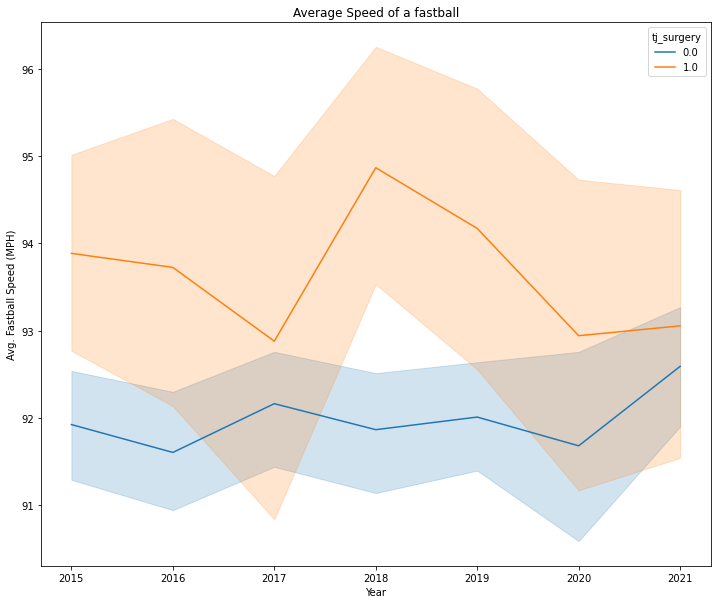

In [ ]:
plt.figure(figsize=(12,10))
plt.title(label='Average Speed of a fastball')
plt.ylabel(ylabel='Avg. Fastball Speed (MPH)')
plt.xlabel(xlabel='Year')
sns.lineplot(data=clean_merge_data, x='year', y=clean_merge_data['fastball_avg_speed'], hue='tj_surgery', markers=True)

In [ ]:
plt.figure(figsize=(12,10))
plt.title(label='Average spin of a fastball (RPM)')
plt.ylabel(ylabel='Avg. spin rate (RPM)')
plt.xlabel(xlabel='Year')
sns.lineplot(data=clean_merge_data, x='year', y=clean_merge_data['fastball_avg_speed'], hue='tj_surgery', markers=True)